In [3]:
import pandas as pd
import json

In [4]:
review_path = './yelp_dataset/yelp_academic_dataset_review.json'
data_file = open(review_path)
data = []
count = 0
for line in data_file:
    data.append(json.loads(line))
    count = count + 1
    if count == 10000:
        break
    
review_df = pd.DataFrame(data)
data_file.close()

In [5]:
review_df.head(6)
#print(review_df.shape[0])

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
5,J4a2TuhDasjn2k3wWtHZnQ,RNm_RWkcd02Li2mKPRe7Eg,xGXzsc-hzam-VArK6eTvtw,1.0,2,0,0,"This place used to be a cool, chill place. Now...",2018-01-21 04:41:03


In [6]:
import numpy as np
random = np.random.randint(9999)
b1_id = review_df.iloc[random]['business_id']

review_b1 = ""
for i in range(review_df.shape[0]):
    business_id = review_df.iloc[i]['business_id']
    if  business_id == b1_id:
        review_b1 = review_b1 + review_df.iloc[i]['text']
    
print(review_b1)

I love the high level of training for the most part.  Friendly staff, awsome coaches,  variety of classes, convenience, great training partners, etc... I love this gym!I appreciate the fact that the classes are offered 7 days a week with plenty of time slots. Teachers and class sizes vary so that can be good and bad. For the weight section you're left to your on devices which I enjoy. The environment is intense. This isn't your YMCA friendly weight room but you'll get a great workout. This is a fight training gym and delivers just that. No frills , just sweat.


[nltk_data] Downloading package punkt to /Users/lingdean/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


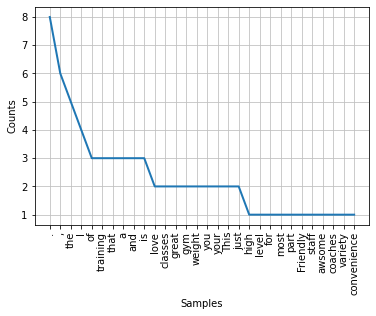

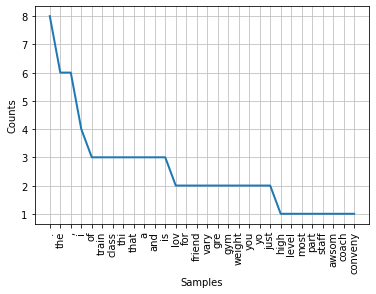

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
#Tokenization and Stemming
#word distribution before stemming
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

ps=PorterStemmer()
ls=LancasterStemmer()

tokens = word_tokenize(review_b1)
fd = nltk.FreqDist(tokens)
fd.plot(30,cumulative=False)

#word distribution after stemming
def stemString(review):
    token_words=word_tokenize(review)
    token_words
    stem_string=[]
    for word in token_words:
        stem_string.append(ls.stem(word))
        stem_string.append(" ")
    return "".join(stem_string)

review_stem=stemString(review_b1)
tokens_stem = word_tokenize(review_stem)
fd = nltk.FreqDist(tokens_stem)
fd.plot(30,cumulative=False)

In [10]:
#POS Tagging
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
#nltk.download()


review = ""
for i in range(5):
    random = np.random.randint(9999)
    review = review + review_df.iloc[random]['text']

review_token = word_tokenize(review)
print(pos_tag(review_token))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lingdean/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
[('I', 'PRP'), ('LOVE', 'VBP'), ('going', 'VBG'), ('into', 'IN'), ('Forty', 'NNP'), ('Winks', 'NNP'), ('!', '.'), ('No', 'DT'), ('matter', 'NN'), ('the', 'DT'), ('kind', 'NN'), ('of', 'IN'), ('bra', 'NN'), ('I', 'PRP'), ("'m", 'VBP'), ('looking', 'VBG'), ('for', 'IN'), (',', ','), ('these', 'DT'), ('ladies', 'NNS'), ('are', 'VBP'), ('always', 'RB'), ('ready', 'JJ'), ('to', 'TO'), ('help', 'VB'), ('&', 'CC'), ('very', 'RB'), ('knowledgeable', 'JJ'), ('.', '.'), ('They', 'PRP'), ('understand', 'VBP'), ('all', 'DT'), ('body', 'NN'), ('types', 'NNS'), ('are', 'VBP'), ('different', 'JJ'), ('&', 'CC'), ('not', 'RB'), ('all', 'DT'), ('bras', 'NNS'), ('(', '('), ('or', 'CC'), ('boobs', 'NN'), (')', ')'), ('are', 'VBP'), ('created', 'VBN'), ('equal', 'JJ'), ('.', '.'), ('Looking', 'VBG'), ('for', 'IN'), ('a', 'DT'), ('specific', 'JJ'), ('size', 'NN'), ('or', 'CC'), ('colour', 'NN'), ('?', '.'), ('They', 'PRP'), ("'